# Wikipedia Notable Life Expectancies
# [Notebook 11: Linear Regression Model ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_olsmodel_thanak_2022_10_9.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
# import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# building regression model
import statsmodels.api as sm

# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# check linear regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# to compare fit between models
from scipy.stats.distributions import chi2

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set(font_scale=1.4)
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
# plt.rc("font", size=12)
# plt.rc("axes", titlesize=15)
# plt.rc("axes", labelsize=14)
# plt.rc("xtick", labelsize=13)
# plt.rc("ytick", labelsize=13)
# plt.rc("legend", fontsize=13)
# plt.rc("legend", fontsize=14)
# plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_preproc.csv), Sampling, and Checking Data Shape

In [2]:
# Reading the train set
data = pd.read_csv("wp_life_expect_preproc.csv")

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 77624 rows and 20 columns.


,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
0,4,73.0,0,0,1,0,0,0,0,0,0,0,1,5329.0,0.250000,8,64,Europe,No Prior Region,spiritual
1,3,90.0,1,0,0,1,0,0,0,0,0,0,2,8100.0,0.333333,13,169,North America,No Prior Region,two


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
77622,7,74.0,0,0,0,0,0,1,0,0,0,0,1,5476.0,0.142857,0,0,North America,No Prior Region,arts
77623,5,92.0,0,0,0,0,0,0,1,0,0,0,1,8464.0,0.200000,8,64,Europe,No Prior Region,sports


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
21264,51,72.0,1,0,0,0,0,0,0,0,0,0,1,5184.0,0.019608,20,400,Europe,No Prior Region,sciences
11508,8,87.0,0,0,0,1,0,0,0,0,0,0,1,7569.0,0.125000,2,4,Europe,No Prior Region,academia_humanities
63940,9,84.0,0,0,0,0,0,1,0,0,0,0,1,7056.0,0.111111,20,400,North America,No Prior Region,arts
48405,16,62.0,0,0,0,0,0,1,0,0,0,0,1,3844.0,0.062500,22,484,Oceania,No Prior Region,arts
53487,21,76.0,0,0,0,1,0,1,0,0,0,0,2,5776.0,0.047619,1,1,North America,No Prior Region,two


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_references             77624 non-null  int64  
 1   age                        77624 non-null  float64
 2   sciences                   77624 non-null  int64  
 3   social                     77624 non-null  int64  
 4   spiritual                  77624 non-null  int64  
 5   academia_humanities        77624 non-null  int64  
 6   business_farming           77624 non-null  int64  
 7   arts                       77624 non-null  int64  
 8   sports                     77624 non-null  int64  
 9   law_enf_military_operator  77624 non-null  int64  
 10  politics_govt_law          77624 non-null  int64  
 11  crime                      77624 non-null  int64  
 12  num_categories             77624 non-null  int64  
 13  age_sqrd                   77624 non-null  flo

<IPython.core.display.Javascript object>

#### Observations:
- With our dataset loaded, we are ready for modeling.
- We have three variables that need typcasting from object to category, then one hot encoding just prior to modeling.

#### Typecasting `region`, `prior_region`, and `known_for` as Categorical

In [6]:
# Typcasting prior_region and region as categorical
df[["prior_region", "region", "known_for"]] = df[
    ["prior_region", "region", "known_for"]
].astype("category")

# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77624 entries, 0 to 77623
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             77624 non-null  int64   
 1   age                        77624 non-null  float64 
 2   sciences                   77624 non-null  int64   
 3   social                     77624 non-null  int64   
 4   spiritual                  77624 non-null  int64   
 5   academia_humanities        77624 non-null  int64   
 6   business_farming           77624 non-null  int64   
 7   arts                       77624 non-null  int64   
 8   sports                     77624 non-null  int64   
 9   law_enf_military_operator  77624 non-null  int64   
 10  politics_govt_law          77624 non-null  int64   
 11  crime                      77624 non-null  int64   
 12  num_categories             77624 non-null  int64   
 13  age_sqrd                   7762

<IPython.core.display.Javascript object>

## Building a Linear Regression Model

### Data Preparation for Modeling
As there is no model tuning in this ordinary least squares model, we will train directly with the `train` set and check performance directly on the `test` set.  The `test` set needs these treatments first:
1. Drop non-human entries.
1. Drop entries with `event_record_other` as sole category.
1. Drop entries with age below 18.
1. Drop `place_2` values that are duplicates of `place_1`.
1. Add the following columns:  
    a. `age_sqrd`  
    b. `recip_num_references`  
    c. `years`  
    d. `years_sqrd`  
    e. `region`  
    f. `prior_region`    
    g. `known_for`  
1. Typcast categorical predictors.
1. Drop unnecessary columns.
1. Missing value treatment.

We will perform one hot encoding of remaining categorical variables on both `train` and `test` when we define independent and dependent variables, `X` and `y`.

### Test Set

#### Loading [Test Set](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_test.csv) and [region_place_dict](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/region_place_dict.pkl)

In [39]:
# Reading test.csv
test = pd.read_csv("wp_life_expect_test.csv")

# Checking shape
print(f"There are {test.shape[0]} rows and {test.shape[1]} columns.")

# Loading region_place_dict
with open("region_place_dict.pkl", "rb") as f:
    region_place_dict = pickle.load(f)

There are 19608 rows and 25 columns.


<IPython.core.display.Javascript object>

In [40]:
# Checking info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19608 entries, 0 to 19607
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        19608 non-null  int64  
 1   name                       19608 non-null  object 
 2   info                       19608 non-null  object 
 3   link                       19608 non-null  object 
 4   num_references             19608 non-null  int64  
 5   year                       19608 non-null  int64  
 6   month                      19608 non-null  object 
 7   info_parenth               6832 non-null   object 
 8   age                        19608 non-null  float64
 9   cause_of_death             6641 non-null   object 
 10  place_1                    19580 non-null  object 
 11  place_2                    1193 non-null   object 
 12  sciences                   19608 non-null  int64  
 13  social                     19608 non-null  int

<IPython.core.display.Javascript object>

#### Pre-processing Steps

In [41]:
%%time

# 1. Dropping non-human entries
rows_to_drop = test[test["other_species"] == 1].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 2. Dropping entries with event_record_other as sole category
rows_to_drop = test[(test['event_record_other']==1) & (test['num_categories']==1)].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 3. Dropping entries with age < 18
rows_to_drop = test[test['age']<18].index
test.drop(rows_to_drop, inplace=True)
test.reset_index(inplace=True, drop=True)

# 4. Dropping place_2 values that are duplicates of place_1
index = [index for index in test.index if test.loc[index, 'place_2']==test.loc[index, 'place_1']]
test.loc[index, 'place_2']==None

# 5a. Creating age_sqrd column
test['age_sqrd'] = test['age']**2

# 5b. Creating recip_num_references column
test["recip_num_references"] = test["num_references"].apply(lambda x: 1 / x)

# 5c. Creating years column
test['years'] = test['year'] - 1994

# 5d. Creating years_sqrd column
test['years_sqrd'] = test['years']**2

# 5e. Creating region column
# For loop to create region column
test["region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[(test["region"].isna()) & (test["place_2"].notna())].index:
            item = test.loc[index, "place_2"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region
        for index in test[(test["region"].isna()) & (test["place_2"].isna())].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "region"] = region

# 5f. Creating prior_region column
# For loop to create prior_region column
test["prior_region"] = None
for region, places in region_place_dict.items():
    for place in places:
        for index in test[
            (test["place_2"].notna()) & (test["prior_region"].isna())
        ].index:
            item = test.loc[index, "place_1"]
            if item:
                if item == place:
                    test.loc[index, "prior_region"] = region
# Adding No Prior Region category
test["prior_region"].fillna("No Prior Region", inplace=True)

# 5g. Creating known_for column
# Initializing known_for
test['known_for']=None
# List of known for columns
cols = ['sciences', 'social', 'spiritual', 'academia_humanities',
       'business_farming', 'arts', 'sports', 'law_enf_military_operator',
       'politics_govt_law', 'crime', 'event_record_other', 'other_species']
# For loop to assign known_for
for index in test[test['known_for'].isna()].index:
    if test.loc[index, 'num_categories']==2:
        test.loc[index, 'known_for'] = 'two'
    elif test.loc[index, 'num_categories'] > 2:
        test.loc[index, 'known_for'] = 'three_to_five'
    else: 
        for column in cols:
            if test.loc[index, column]==1:
                test.loc[index, 'known_for'] = column

# 8. Typecasting categorical predictors
test[['region', 'prior_region', 'known_for']] = test[['region', 'prior_region', 'known_for']].astype('category')

# 9. Dropping Unnecessary Columns
cols_to_drop = [
   'day', 'name', 'info', 'link', 'year', 'month',
       'info_parenth', 'cause_of_death', 'place_1', 'place_2',
       'event_record_other', 'other_species',
]
test.drop(cols_to_drop, axis=1, inplace=True)

# Rechecking columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19420 entries, 0 to 19419
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_references             19420 non-null  int64   
 1   age                        19420 non-null  float64 
 2   sciences                   19420 non-null  int64   
 3   social                     19420 non-null  int64   
 4   spiritual                  19420 non-null  int64   
 5   academia_humanities        19420 non-null  int64   
 6   business_farming           19420 non-null  int64   
 7   arts                       19420 non-null  int64   
 8   sports                     19420 non-null  int64   
 9   law_enf_military_operator  19420 non-null  int64   
 10  politics_govt_law          19420 non-null  int64   
 11  crime                      19420 non-null  int64   
 12  num_categories             19420 non-null  int64   
 13  age_sqrd                   1942

<IPython.core.display.Javascript object>

In [42]:
# Checking a sample of rows
test.sample(5)

,num_references,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,num_categories,age_sqrd,recip_num_references,years,years_sqrd,region,prior_region,known_for
1738,14,79.0,0,0,0,0,0,0,0,0,1,0,1,6241.0,0.071429,22,484,Europe,Europe,politics_govt_law
6998,16,82.0,0,0,0,0,0,0,0,0,1,1,2,6724.0,0.062500,12,144,North America,No Prior Region,two
6446,3,70.0,0,0,0,0,0,0,1,0,0,0,1,4900.0,0.333333,21,441,South America,No Prior Region,sports
7855,4,85.0,1,0,0,0,0,0,0,0,1,0,2,7225.0,0.250000,8,64,North America,North America,two
17795,5,90.0,0,0,0,0,0,0,0,0,1,0,1,8100.0,0.200000,13,169,Europe,No Prior Region,politics_govt_law


<IPython.core.display.Javascript object>

#### Observations:
- Treatment of `test` missing values is the only remaining step.
- We will use the modes for the `known_for` groups from `train` to fill missing values for `test` to avoid data leakage.  `region` is the only column with missing values.

#### Treating Missing Values for `region` in Test

In [43]:
# Checking the starting missing values
print(f'There are {test["region"].isna().sum()} missing values.')

There are 20 missing values.


<IPython.core.display.Javascript object>

In [44]:
# Creating list of known for category columns
cols = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
]

# For loop to impute test missing values with mode of train rows with equivalent known_for class or column mode
for index in test[test["region"].isna()].index:

    if test.loc[index, "num_categories"] == 1:
        for category in cols:
            group_mode = df[df["known_for"] == category]["region"].mode().iloc[0]
            test.loc[index, "region"] = group_mode

    elif test.loc[index, "num_categories"] == 2:
        group_mode = df[df["known_for"] == "two"]["region"].mode().iloc[0]
        test.loc[index, "region"] = group_mode

    elif 2 < test.loc[index, "num_categories"] < 6:
        group_mode = df[df["known_for"] == "three_to_five"]["region"].mode().iloc[0]
        test.loc[index, "region"] = group_mode

    else:
        column_mode = df["region"].mode().iloc[0]
        test.loc[index, "region"] = column_mode

#  Checking missing values after treatment
print(f'There are {test["region"].isna().sum()} missing values.')

# Checking region value_counts
test["region"].value_counts()

There are 0 missing values.


North America                 8054
Europe                        6128
Asia                          1637
Oceania                        981
Africa                         676
Middle East                    460
South America                  441
Mid-Cent America/Caribbean     389
Russian Federation             325
South East Asia                310
Central Asia                    19
Name: region, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- `train` and `test` are both ready for modeling.
- We will perform one hot encoding when defining our independent variables.

In [322]:
df["num_references_transformed"] = np.log(df["num_references"])
test["num_references_transformed"] = np.log(test["num_references"])

<IPython.core.display.Javascript object>

### with `age_sqrd` and `recip_num_references` Transformations

#### Defining Independent and Dependent Variables for Train and Test Sets

In [365]:
# Creating list of predictor columns
predictor_cols = [
    "recip_num_references",
    "years_sqrd",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age_sqrd"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77624 rows and 35 columns in X_train.
There are 19420 rows and 35 columns in X_test.



,const,recip_num_references,years_sqrd,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
42630,1.0,0.031250,729.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
67587,1.0,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [366]:
# Checking a sample of test set
X_test.sample(2)

,const,recip_num_references,years_sqrd,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
17081,1.0,0.142857,324.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,1.0,0.333333,729.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [367]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     234.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:10:01   Log-Likelihood:            -7.0335e+05
No. Observations:               77624   AIC:                         1.407e+06
Df Residuals:                   77589   BIC:                         1.407e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Functions to check model performance

In [368]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set

In [369]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2084.057852,1685.020554,0.09313,0.092721,50.51246


<IPython.core.display.Javascript object>

### Model Performance on Test Set

In [370]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2076.119693,1680.549171,0.090913,0.089271,49.151144


<IPython.core.display.Javascript object>

#### Observations:
- The train and test $R^2$ are 0.096 and 0.093, respectively, indicating that the model explains 9.6% of total variation in the train set and 9.3% of variation in the test set, so a very small amount, but not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.6 years on the test set.
- MAPE of 19% on the test set means that we are able to predict within 19% of the reported age, in years.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [371]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [372]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,384.557028
18,prior_region_No Prior Region,16.899086
15,prior_region_Europe,10.310738
8,region_North America,7.834925
24,known_for_arts,7.513942
5,region_Europe,7.125241
32,known_for_sports,5.435880
28,known_for_politics_govt_law,5.011301
34,known_for_two,4.465044
3,region_Asia,3.186406


<IPython.core.display.Javascript object>

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- We will accept the higher VIF value belonging to the constant as the constant is necessary for the residuals to have zero mean, avoiding bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance, then re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- When dropping dummy variables, we will add the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [373]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [374]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.092645,2084.627681
1,prior_region_Europe,0.091982,2085.389288
2,known_for_politics_govt_law,0.091945,2085.431830
3,known_for_arts,0.089170,2088.616052
4,known_for_sports,0.083611,2094.980601
5,region_Europe,0.081594,2097.284112
6,region_North America,0.079968,2099.140664


<IPython.core.display.Javascript object>

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [375]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,67.277539
8,region_North America,7.832054
23,known_for_arts,7.513645
5,region_Europe,7.124242
31,known_for_sports,5.435873
27,known_for_politics_govt_law,5.011293
33,known_for_two,4.464994
3,region_Asia,3.184800
28,known_for_sciences,2.687151
9,region_Oceania,2.312177


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [376]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.091858,2085.532419
1,known_for_arts,0.089076,2088.724362
2,known_for_sports,0.083526,2095.077348
3,region_Europe,0.081481,2097.413325
4,region_North America,0.079833,2099.294023


<IPython.core.display.Javascript object>

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [377]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,38.749608
8,region_North America,7.809403
5,region_Europe,7.093777
3,region_Asia,3.181816
9,region_Oceania,2.310344
23,known_for_arts,1.862518
7,region_Middle East,1.725875
11,region_South America,1.664229
30,known_for_sports,1.633286
6,region_Mid-Cent America/Caribbean,1.551860


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [378]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.080249,2098.819063
1,region_North America,0.078661,2100.631061


<IPython.core.display.Javascript object>

#### Observations:
- That iteration got us down to two remaining high VIF columns.
- Of the remaining high VIF columns, `region_Europe` has the least impact on performance when dropped, so we will drop it.

#### Dropping `region_Europe`

In [379]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,13.992461
22,known_for_arts,1.847431
29,known_for_sports,1.624146
31,known_for_two,1.487219
7,region_North America,1.309653
26,known_for_sciences,1.253174
3,region_Asia,1.156229
25,known_for_law_enf_military_operator,1.137037
8,region_Oceania,1.093835
28,known_for_spiritual,1.092293


<IPython.core.display.Javascript object>

#### Observations:
- `prior_region_No Prior Region`, `known_for_politics_govt_law`, and `region_Europe` columns were dropped and there are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Europe
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [380]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     219.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:11:00   Log-Likelihood:            -7.0388e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77592   BIC:                         1.408e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [381]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['prior_region_South America', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_Central Asia', 'known_for_social', 'prior_region_Oceania', 'prior_region_North America', 'prior_region_Asia', 'region_Oceania']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [382]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa, Europe, OR Oceania
    - `prior_region`: Africa, No Prior Region, Central Asia, South America, Mid-Cent America/Caribbean, Oceania, North America, OR Asia
    - `known_for`: academia_humanities, politics_govt_law, social, OR business_farming

#### Fitting Third Model

In [383]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:               age_sqrd   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     295.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:11:34   Log-Likelihood:            -7.0389e+05
No. Observations:               77624   AIC:                         1.408e+06
Df Residuals:                   77600   BIC:                         1.408e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- Adjusted $R^2$ has held at 0.082 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 22 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [384]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.sample(5)

,Actual Values,Fitted Values,Residuals
76504,7569.0,6463.849789,1105.150211
47721,3364.0,6102.342700,-2738.342700
26019,7225.0,6899.106778,325.893222
67625,4900.0,5742.420083,-842.420083
40100,4900.0,5548.709181,-648.709181


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

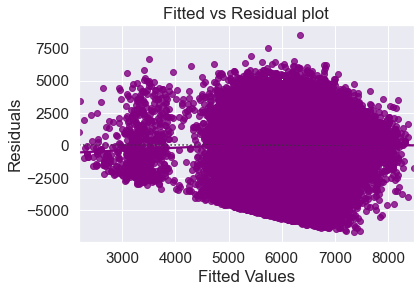

<IPython.core.display.Javascript object>

In [385]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is an underrepresented age group from ~58 to ~63 years in the predictions, resulting in two groups which is interesting.
- Within itself, the under 60 group shows no obvious pattern.
- The group above 60 is heavy on the bottom, indicating larger underestimates for age here, and wider variance.
- **Overall, there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to permit interpretation of coefficients.**
- We will be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Test for Normality

#### Histogram

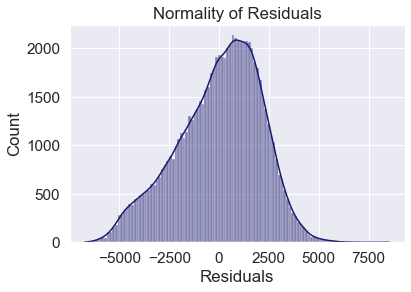

<IPython.core.display.Javascript object>

In [386]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

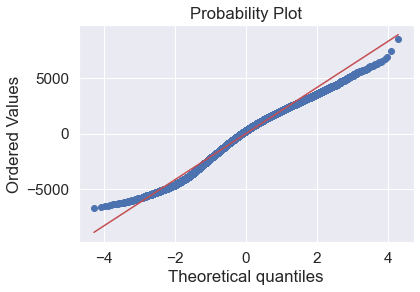

<IPython.core.display.Javascript object>

In [387]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The distribution of the residuals does have an overall bell shape, but is quite peaked at ~8, with a thicker tail on the negative end.
- As we saw during EDA, there are possibly two Guassian's here.
- The Q-Q plot and the histogram show that the distribution is left-skewed.
- **We cannot strictly say that the assumption of normally distributed residuals is met.**
- Our plan is to apply other modeling algorithms, so we will see how they compare.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [388]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

[('F statistic', 1.001428613053148), ('p-value', 0.44410126831846086)]

<IPython.core.display.Javascript object>

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- **Not all of the assumptions of linear regression are strictly met.  However, we will accept them as sufficiently met to allow for guarded interpretation of coefficients.**

### First Iteration:  Original Target and Predictors

#### Defining Independent and Dependent Variables for Train and Test Sets

In [92]:
# Creating list of predictor columns
predictor_cols = [
    "num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77624 rows and 35 columns in X_train.
There are 19420 rows and 35 columns in X_test.



,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
47835,1.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17194,1.0,4.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

In [93]:
# Checking a sample of test set
X_test.sample(2)

,const,num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
1507,1.0,30.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15946,1.0,9.0,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [94]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     237.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:53:29   Log-Likelihood:            -3.2069e+05
No. Observations:               77624   AIC:                         6.415e+05
Df Residuals:                   77589   BIC:                         6.418e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Functions to check model performance

In [95]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set

In [96]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.065917,11.688861,0.094138,0.093729,19.303087


<IPython.core.display.Javascript object>

### Model Performance on Test Set

In [97]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.943564,11.616113,0.092009,0.09037,18.975772


<IPython.core.display.Javascript object>

#### Observations:
- The train and test $R^2$ are 0.096 and 0.093, respectively, indicating that the model explains 9.6% of total variation in the train set and 9.3% of variation in the test set, so a very small amount, but not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.6 years on the test set.
- MAPE of 19% on the test set means that we are able to predict within 19% of the reported age, in years.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [98]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [99]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,386.230575
18,prior_region_No Prior Region,16.896379
15,prior_region_Europe,10.310281
8,region_North America,7.831626
24,known_for_arts,7.512367
5,region_Europe,7.115850
32,known_for_sports,5.431959
28,known_for_politics_govt_law,5.012805
34,known_for_two,4.462342
3,region_Asia,3.186094


<IPython.core.display.Javascript object>

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- We will accept the higher VIF value belonging to the constant as the constant is necessary for the residuals to have zero mean, avoiding bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance, then re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- When dropping dummy variables, we will add the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [100]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [101]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.093631,15.070224
1,known_for_politics_govt_law,0.093100,15.074640
2,prior_region_Europe,0.093009,15.075395
3,known_for_arts,0.090104,15.099519
4,known_for_sports,0.084190,15.148509
5,region_Europe,0.081749,15.168685
6,region_North America,0.080788,15.176623


<IPython.core.display.Javascript object>

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [102]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,68.023096
8,region_North America,7.828747
23,known_for_arts,7.512042
5,region_Europe,7.114770
31,known_for_sports,5.431947
27,known_for_politics_govt_law,5.012797
33,known_for_two,4.462278
3,region_Asia,3.184470
28,known_for_sciences,2.685079
9,region_Oceania,2.311697


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [103]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.092990,15.075555
1,known_for_arts,0.089986,15.100500
2,known_for_sports,0.084084,15.149387
3,region_Europe,0.081608,15.169848
4,region_North America,0.080626,15.177961


<IPython.core.display.Javascript object>

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [104]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,39.624905
8,region_North America,7.805973
5,region_Europe,7.084507
3,region_Asia,3.181501
9,region_Oceania,2.309870
23,known_for_arts,1.857376
7,region_Middle East,1.725281
11,region_South America,1.661641
30,known_for_sports,1.629793
6,region_Mid-Cent America/Caribbean,1.551201


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [105]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.080546,15.178621
1,region_North America,0.079629,15.186184


<IPython.core.display.Javascript object>

#### Observations:
- That iteration got us down to two remaining high VIF columns.
- Of the remaining high VIF columns, `region_Europe` has the least impact on performance when dropped, so we will drop it.

#### Dropping `region_Europe`

In [106]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,13.817032
22,known_for_arts,1.842883
29,known_for_sports,1.620243
31,known_for_two,1.481716
7,region_North America,1.300053
26,known_for_sciences,1.251220
3,region_Asia,1.154873
25,known_for_law_enf_military_operator,1.135517
28,known_for_spiritual,1.092299
8,region_Oceania,1.092077


<IPython.core.display.Javascript object>

#### Observations:
- `prior_region_No Prior Region`, `known_for_politics_govt_law`, and `region_Europe` columns were dropped and there are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Europe
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [107]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     220.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:54:28   Log-Likelihood:            -3.2126e+05
No. Observations:               77624   AIC:                         6.426e+05
Df Residuals:                   77592   BIC:                         6.429e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [108]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['known_for_social', 'prior_region_Central Asia', 'prior_region_South America', 'region_Oceania', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_North America', 'prior_region_Oceania', 'known_for_business_farming', 'prior_region_Asia']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [109]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa, Europe, OR Oceania
    - `prior_region`: Africa, No Prior Region, Central Asia, South America, Mid-Cent America/Caribbean, Oceania, North America, OR Asia
    - `known_for`: academia_humanities, politics_govt_law, social, OR business_farming

#### Fitting Third Model

In [110]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     310.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:54:41   Log-Likelihood:            -3.2126e+05
No. Observations:               77624   AIC:                         6.426e+05
Df Residuals:                   77601   BIC:                         6.428e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- Adjusted $R^2$ has held at 0.082 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 22 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [111]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.sample(5)

,Actual Values,Fitted Values,Residuals
61235,80.0,79.979312,0.020688
71908,84.0,72.412968,11.587032
43223,81.0,76.948190,4.051810
75953,80.0,79.190811,0.809189
72760,90.0,81.530940,8.469060


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

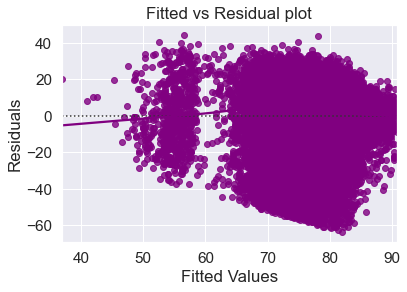

<IPython.core.display.Javascript object>

In [112]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is an underrepresented age group from ~58 to ~63 years in the predictions, resulting in two groups which is interesting.
- Within itself, the under 60 group shows no obvious pattern.
- The group above 60 is heavy on the bottom, indicating larger underestimates for age here, and wider variance.
- **Overall, there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to permit interpretation of coefficients.**
- We will be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Test for Normality

#### Histogram

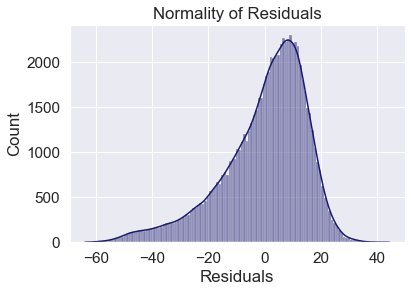

<IPython.core.display.Javascript object>

In [113]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

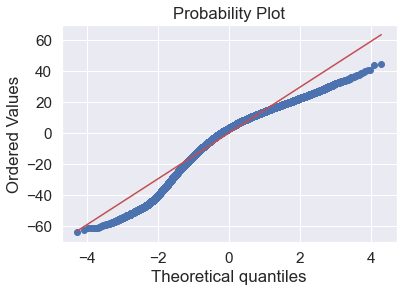

<IPython.core.display.Javascript object>

In [114]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The distribution of the residuals does have an overall bell shape, but is quite peaked at ~8, with a thicker tail on the negative end.
- As we saw during EDA, there are possibly two Guassian's here.
- The Q-Q plot and the histogram show that the distribution is left-skewed.
- **We cannot strictly say that the assumption of normally distributed residuals is met.**
- Our plan is to apply other modeling algorithms, so we will see how they compare.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [115]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

[('F statistic', 1.0030224596582749), ('p-value', 0.3831627545087869)]

<IPython.core.display.Javascript object>

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- **Not all of the assumptions of linear regression are strictly met.  However, we will accept them as sufficiently met to allow for guarded interpretation of coefficients.**

### Second Iteration: Original Target, Transformed `num_references` to `recip_num_references`

#### Defining Independent and Dependent Variables for Train and Test Sets

In [116]:
# Creating list of predictor columns
predictor_cols = [
    "recip_num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = "age"

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

There are 77624 rows and 35 columns in X_train.
There are 19420 rows and 35 columns in X_test.



,const,recip_num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
6233,1.0,0.040000,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49337,1.0,0.090909,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

In [117]:
# Checking a sample of test set
X_test.sample(2)

,const,recip_num_references,years,region_Asia,region_Central Asia,region_Europe,region_Mid-Cent America/Caribbean,region_Middle East,region_North America,region_Oceania,region_Russian Federation,region_South America,region_South East Asia,prior_region_Asia,prior_region_Central Asia,prior_region_Europe,prior_region_Mid-Cent America/Caribbean,prior_region_Middle East,prior_region_No Prior Region,prior_region_North America,prior_region_Oceania,prior_region_Russian Federation,prior_region_South America,prior_region_South East Asia,known_for_arts,known_for_business_farming,known_for_crime,known_for_law_enf_military_operator,known_for_politics_govt_law,known_for_sciences,known_for_social,known_for_spiritual,known_for_sports,known_for_three_to_five,known_for_two
16634,1.0,0.076923,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3448,1.0,0.200000,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [118]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     241.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:00:18   Log-Likelihood:            -3.2063e+05
No. Observations:               77624   AIC:                         6.413e+05
Df Residuals:                   77589   BIC:                         6.417e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

### Model Performance Check

#### Functions to check model performance

In [119]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

#### Model Performance on Train Set

In [120]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.053158,11.681181,0.095671,0.095263,19.281428


<IPython.core.display.Javascript object>

### Model Performance on Test Set

In [121]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Peformance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,14.929609,11.609011,0.093704,0.092068,18.957198


<IPython.core.display.Javascript object>

#### Observations:
- The train and test $R^2$ are 0.096 and 0.093, respectively, indicating that the model explains 9.6% of total variation in the train set and 9.3% of variation in the test set, so a very small amount, but not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.6 years on the test set.
- MAPE of 19% on the test set means that we are able to predict within 19% of the reported age, in years.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [122]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

#### VIF

In [123]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,388.019358
18,prior_region_No Prior Region,16.898996
15,prior_region_Europe,10.310802
8,region_North America,7.831099
24,known_for_arts,7.513845
5,region_Europe,7.125098
32,known_for_sports,5.436000
28,known_for_politics_govt_law,5.011302
34,known_for_two,4.465206
3,region_Asia,3.186478


<IPython.core.display.Javascript object>

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- We will accept the higher VIF value belonging to the constant as the constant is necessary for the residuals to have zero mean, avoiding bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance, then re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- When dropping dummy variables, we will add the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [124]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [125]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,prior_region_No Prior Region,0.095180,15.057346
1,known_for_politics_govt_law,0.094594,15.062216
2,prior_region_Europe,0.094568,15.062434
3,known_for_arts,0.091708,15.086202
4,known_for_sports,0.085368,15.138763
5,region_Europe,0.083673,15.152787
6,region_North America,0.082365,15.163600


<IPython.core.display.Javascript object>

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [126]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,70.571808
8,region_North America,7.828212
23,known_for_arts,7.513549
5,region_Europe,7.124096
31,known_for_sports,5.435993
27,known_for_politics_govt_law,5.011294
33,known_for_two,4.465156
3,region_Asia,3.184874
28,known_for_sciences,2.687136
9,region_Oceania,2.311682


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [127]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,known_for_politics_govt_law,0.094498,15.063015
1,known_for_arts,0.091605,15.087059
2,known_for_sports,0.085275,15.139532
3,region_Europe,0.083550,15.153807
4,region_North America,0.082220,15.164800


<IPython.core.display.Javascript object>

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [128]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,42.054357
8,region_North America,7.805560
5,region_Europe,7.093634
3,region_Asia,3.181891
9,region_Oceania,2.309848
23,known_for_arts,1.862450
7,region_Middle East,1.725827
11,region_South America,1.664255
30,known_for_sports,1.633425
6,region_Mid-Cent America/Caribbean,1.551759


<IPython.core.display.Javascript object>

#### Checking Impact of Dropping Columns on Model Performance

In [129]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,region_Europe,0.082442,15.162959
1,region_North America,0.081175,15.173426


<IPython.core.display.Javascript object>

#### Observations:
- That iteration got us down to two remaining high VIF columns.
- Of the remaining high VIF columns, `region_Europe` has the least impact on performance when dropped, so we will drop it.

#### Dropping `region_Europe`

In [130]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

,feature,VIF
0,const,17.025691
22,known_for_arts,1.847354
29,known_for_sports,1.624305
31,known_for_two,1.487406
7,region_North America,1.308292
26,known_for_sciences,1.253162
3,region_Asia,1.155851
25,known_for_law_enf_military_operator,1.136867
8,region_Oceania,1.093786
28,known_for_spiritual,1.092254


<IPython.core.display.Javascript object>

#### Observations:
- `prior_region_No Prior Region`, `known_for_politics_govt_law`, and `region_Europe` columns were dropped and there are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Europe
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [131]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     226.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:01:14   Log-Likelihood:            -3.2118e+05
No. Observations:               77624   AIC:                         6.424e+05
Df Residuals:                   77592   BIC:                         6.427e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>

#### Checking Features with High Coefficient p-values

In [132]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

Features with high p-values to exclude: ['known_for_social', 'prior_region_Central Asia', 'prior_region_South America', 'prior_region_Mid-Cent America/Caribbean', 'prior_region_Oceania', 'prior_region_North America', 'region_Oceania', 'prior_region_Asia', 'known_for_business_farming']


<IPython.core.display.Javascript object>

#### Dropping `excluded_features` with High p-values

In [133]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa, Europe, OR Oceania
    - `prior_region`: Africa, No Prior Region, Central Asia, South America, Mid-Cent America/Caribbean, Oceania, North America, OR Asia
    - `known_for`: academia_humanities, politics_govt_law, social, OR business_farming

#### Fitting Third Model

In [134]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     317.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:01:29   Log-Likelihood:            -3.2118e+05
No. Observations:               77624   AIC:                         6.424e+05
Df Residuals:                   77601   BIC:                         6.426e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

<IPython.core.display.Javascript object>

#### Observations:
- Adjusted $R^2$ has held at 0.082 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 22 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [135]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.sample(5)

,Actual Values,Fitted Values,Residuals
20095,50.0,79.033666,-29.033666
56936,88.0,77.977731,10.022269
61351,78.0,72.027167,5.972833
17491,91.0,77.475479,13.524521
1776,69.0,74.814911,-5.814911


<IPython.core.display.Javascript object>

#### Plot of Fitted Values vs Residuals

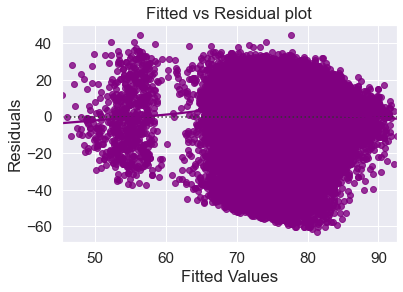

<IPython.core.display.Javascript object>

In [136]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is an underrepresented age group from ~58 to ~63 years in the predictions, resulting in two groups which is interesting.
- Within itself, the under 60 group shows no obvious pattern.
- The group above 60 is heavy on the bottom, indicating larger underestimates for age here, and wider variance.
- **Overall, there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to permit interpretation of coefficients.**
- We will be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Test for Normality

#### Histogram

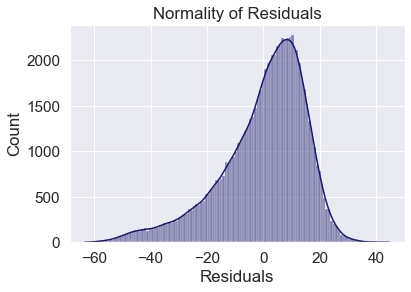

<IPython.core.display.Javascript object>

In [137]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

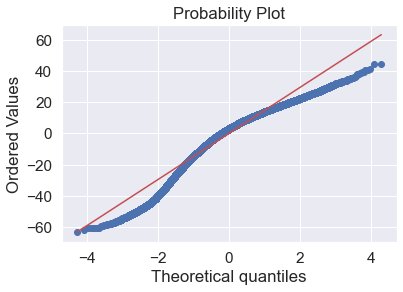

<IPython.core.display.Javascript object>

In [138]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The distribution of the residuals does have an overall bell shape, but is quite peaked at ~8, with a thicker tail on the negative end.
- As we saw during EDA, there are possibly two Guassian's here.
- The Q-Q plot and the histogram show that the distribution is left-skewed.
- **We cannot strictly say that the assumption of normally distributed residuals is met.**
- Our plan is to apply other modeling algorithms, so we will see how they compare.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [139]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

[('F statistic', 1.0024164902424968), ('p-value', 0.4060668463816706)]

<IPython.core.display.Javascript object>

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- **Not all of the assumptions of linear regression are strictly met.  However, we will accept them as sufficiently met to allow for guarded interpretation of coefficients.**

## Final Model Summary

### *olsmodel3* summary

In [ ]:
print(olsmodel3.summary())

#### Final Model Performance on Train Set

In [ ]:
# Checking final model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel3, X_train, y_train)
olsmodel_train_perf

#### Final Model Performance on Validation Set

In [ ]:
# Checking final model performance on test set
print("Testing Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel3, X_test, y_test)
olsmodel_test_perf

#### Observations:
- With $R^2$ of only 0.082 on the train set, our model is underfitting.  The predictors are only able to explain ~8% of the variation from the mean actual age.
- Test $R^2$ of 0.079 indicates that the model is not overfitting, as it compares to that of the test set along with other measures.
- MAE of 11.7 suggests that the model can predict within a mean error of 11.7 years on the test data.
- MAPE of 19.3 on the test data means that we aree able to predict within ~19.3% of age.

## Interpreting *olsmodel3* Parameters

In [ ]:
# For loop to make list of parameters with p-values < 0.05
# Final model predictors
final_pred = X_train

# initial list of all independent variable columns excluding constant
cols = final_pred.columns[1:]

# initial list of columns to interpret
features_to_interp = []

# for loop to create list of features with p < 0.05
for feature in cols:
    p_value = olsmodel3.pvalues[feature]
    if p_value < 0.05:
        features_to_interp.append(feature)

print(
    "Features with interpretable coefficient confidence intervals: \n\n", feat_to_interp
)

#### Interpreting Final Features Coefficients (p-values < 0.05)

In [ ]:
# creating a dataframe of features, coefficients, and interpretations
interp_df = pd.DataFrame(olsmodel3.params).loc[features_to_interp, :].reset_index()
interp_df.rename({"index": "Feature", 0: "Coefficient"}, axis=1, inplace=True)

# title for interpretation column
title = "Impact on Age (all else constant; compared to reference levels for category)"

# for loop to indicate how used price % changes in relation to feature dependent on feature type/transformation
for i, feature in enumerate(interp_df["Feature"]):

    # for mutliplicative inverse transformed features based on 10-fold factor change in feature
    if feature.startswith("recip"):
        interp_df.loc[
            i, title
        ] = f"geometric decrease (*{round(((interp_df.loc[i, 'Coefficient'])*.01), 2)}) with each 10-fold increase in {feature.removeprefix('recip_')}"

    # for categorical one hot encoded
    elif feature.startswith('region'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"
        
    # for categorical one hot encoded
    elif feature.startswith('prior_region'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"

    # for categorical one hot encoded
    elif feature.startswith('known_for'):
        interp_df.loc[
            i, title
        ] = f"{np.round((interp_df.loc[i, 'Coefficient']), 2)} year change with {feature}"
    # for numeric not transformed
    else:
        interp_df.loc[
            i, title
        ] = f"{np.round(interp_df.loc[i, 'Coefficient']*10, 2)} year change with 10 unit change in {feature}"

pd.set_option("max_colwidth", 100)
interp_df


In [ ]:
print("dunzo!")

# Sound notification when cell executes
chime.success()

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean.db]()

In [ ]:
# # Exporting dataframe

# # Saving dataset in a SQLite database
# conn = sql.connect("wp_life_expect_clean.db")
# df.to_sql("wp_life_expect_clean", conn, index=False)

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()

#### Defining Independent and Dependent Variables for Train and Test Sets

In [ ]:
# Creating list of predictor columns
predictor_cols = [
    "recip_num_references",
    "years",
    "region",
    "prior_region",
    "known_for",
]

# Defining target column
target = 'age'

# Defining independent and dependent variables
X_train, X_test = df[predictor_cols], test[predictor_cols]
y_train, y_test = df[target], test[target]


# One hot encoding independent categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Adding the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Typecasting independent variables as float
X_train = X_train.astype("float64")
X_test = X_test.astype("float64")

# Checking shape of train and test sets
print(f"There are {X_train.shape[0]} rows and {X_train.shape[1]} columns in X_train.")
print(f"There are {X_test.shape[0]} rows and {X_test.shape[1]} columns in X_test.\n")

# Checking a sample of train set
X_train.sample(2)

In [ ]:
# Checking a sample of test set
X_test.sample(2)

#### Observations:
- We are ready to build our model.
- The references levels for the categorical features are as follows:
    - `region`: Africa
    - `prior_region`: Africa
    - `known_for` academia_humanities

### Fitting a Linear Model

In [ ]:
# Fitting a linear model and displaying model summary
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

### Model Performance Check

#### Functions to check model performance

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100


# function to compute and display different metrics to check performance of a regression model
# with conversion back to original scale for RMSE, MAE, and MAPE for ease of explainability
def model_performance_regression(model, predictors, target):
    """
    Function to compute and return a dataframe of different metrics to check
    regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predictions
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### Model Performance on Train Set

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

### Model Performance on Test Set

In [ ]:
# Checking model performance on validation set
print("Test Peformance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

#### Observations:
- The train and test $R^2$ are 0.096 and 0.093, respectively, indicating that the model explains 9.6% of total variation in the train set and 9.3% of variation in the test set, so a very small amount, but not nothing.
- RMSE values for the two sets are also comparable, at ~15.
- The comparable results between the two sets show that the model is not overfitting.
- MAE indicates that our current model is able to predict age of reported deceased notable Wikipedia individuals within a mean error of ~11.6 years on the test set.
- MAPE of 19% on the test set means that we are able to predict within 19% of the reported age, in years.

### Checking Linear Regression Assumptions

### Test for Multicollinearity

#### Function to check VIF of Each Independent Variable

In [ ]:
# Define a function to check and display VIF of each independent variable
def checking_vif(predictors):
    """
    Takes input dependent variables predictors and returns
    a dataframe of variable name and VIF
    """
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

#### VIF

In [ ]:
# Checking vif
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Observations:
- The majority of predictors have low VIF (< 5), which is good.
- We will accept the higher VIF value belonging to the constant as the constant is necessary for the residuals to have zero mean, avoiding bias.
- We will proceed by checking the impact on performance of dropping each of the high VIF columns, and drop the column with the least impact on performance, then re-evaluate VIF.  
- This process is iterative until we have all low VIF columns.
- When dropping dummy variables, we will add the dropped class to the reference class.

#### Function to Treat Multicollinearity

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

#### Checking Impact of Dropping Columns on Model Performance

In [ ]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

#### Observations:
- Of the high VIF columns, `prior_region_No Prior Region` has the least impact on performance when dropped, so we will drop it.

#### Dropping `prior_region_No Prior Region`

In [ ]:
# Dropping prior_region_No Prior Region column
col_to_drop = "prior_region_No Prior Region"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Checking Impact of Dropping Columns on Model Performance

In [ ]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

#### Observations:
- Of the remaining high VIF columns, `known_for_politics_govt_law` has the least impact on performance when dropped, so we will drop it.

#### Dropping `known_for_politics_govt_law`

In [ ]:
# Dropping known_for_politics_govt_law column
col_to_drop = "known_for_politics_govt_law"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Checking Impact of Dropping Columns on Model Performance

In [ ]:
# Checking impact of dropping columns
col_list = vif[vif["VIF"] >= 5]["feature"].tolist()
col_list.remove("const")

results = treating_multicollinearity(X_train, y_train, col_list)
results

#### Observations:
- That iteration got us down to two remaining high VIF columns.
- Of the remaining high VIF columns, `region_Europe` has the least impact on performance when dropped, so we will drop it.

#### Dropping `region_Europe`

In [ ]:
# Dropping region_Europe column
col_to_drop = "region_Europe"
X_train = X_train.drop(col_to_drop, axis=1)
X_test = X_test.drop(col_to_drop, axis=1)

# Recheck VIF
vif = checking_vif(X_train).sort_values(by="VIF", ascending=False)
vif

#### Observations:
- `prior_region_No Prior Region`, `known_for_politics_govt_law`, and `region_Europe` columns were dropped and there are no remaining high VIF columns, excluding the constant, which we will retain.
- **So, the assumption of independence of predictor variables (absence of multicollinearity) is satisfied.**
- The updated reference levels for each feature are as follows:
    - `region`: Africa OR Europe
    - `prior_region`: Africa OR No Prior Region
    - `known_for`: academia_humanities OR politics_govt_law
- Next, we will fit our second model, then drop columns with high p-values for their coefficients.

#### Fitting Second Model

In [ ]:
# Fitting a linear model and displaying model summary
olsmodel2 = sm.OLS(y_train, X_train).fit()
print(olsmodel2.summary())

#### Checking Features with High Coefficient p-values

In [ ]:
## Loop for Dropping variables with high coefficient p-values one at a time excluding constant and dummy variables
# Current model predictors
train_predictors = X_train

# initial list of all independent variable columns including constant
cols = train_predictors.columns.to_list()

# initial empty list of independent variables to exclude
excluded_features = []

# setting an initial max p_value
max_p_value = 1

for i in range(len(cols)):
    # defining the train set
    x_train_aux = train_predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues[cols]
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        excluded_features.append(feature_with_p_max)
    else:
        break

print(f"Features with high p-values to exclude: {excluded_features}")

#### Dropping `excluded_features` with High p-values

In [ ]:
# Dropping excluded_features
X_train.drop(excluded_features, axis=1, inplace=True)
X_test.drop(excluded_features, axis=1, inplace=True)

#### Observations:
- We dropped several columns with high p-values.
- The updated reference levels for each feature are as follows:
    - `region`: Africa, Europe, OR Oceania
    - `prior_region`: Africa, No Prior Region, Central Asia, South America, Mid-Cent America/Caribbean, Oceania, North America, OR Asia
    - `known_for`: academia_humanities, politics_govt_law, social, OR business_farming

#### Fitting Third Model

In [ ]:
# fitting third model and printing summary
olsmodel3 = sm.OLS(y_train, X_train).fit()
print(olsmodel3.summary())

#### Observations:
- Adjusted $R^2$ has held at 0.082 after dropping the high p-value columns, indicating that the dropped variables were not affecting the model much at all.
- **Now, no other feature, including the constant, has a p-value greater than 0.05, so we will consider these features as the final set of predictor variables and *olsmodel3* as the final model.**
- *olsmodel3* has 22 predictors plut the constant term.
- We will now check the remaining assumptions for linear regression.

### Test for Linearity and Independence

#### Dataframe of Actual, Fitted, and Residual Values

In [ ]:
# Dataframe of actual, fitted, and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.sample(5)

#### Plot of Fitted Values vs Residuals

In [ ]:
# Plot of fitted values vs residuals
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
- There is an underrepresented age group from ~58 to ~63 years in the predictions, resulting in two groups which is interesting.
- Within itself, the under 60 group shows no obvious pattern.
- The group above 60 is heavy on the bottom, indicating larger underestimates for age here, and wider variance.
- **Overall, there is not a definitive pattern, so we will consider the assumptions of independence and linearity sufficiently met to permit interpretation of coefficients.**
- We will be testing further for homoscedasticity, via the Goldfeld-Quandt test.

### Test for Normality

#### Histogram

In [ ]:
# Histogram of residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of Residuals")
plt.show()

#### Q-Q plot

In [ ]:
# checking the Q-Q plot
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The distribution of the residuals does have an overall bell shape, but is quite peaked at ~8, with a thicker tail on the negative end.
- As we saw during EDA, there are possibly two Guassian's here.
- The Q-Q plot and the histogram show that the distribution is left-skewed.
- **We cannot strictly say that the assumption of normally distributed residuals is met.**
- Our plan is to apply other modeling algorithms, so we will see how they compare.

### Test for Homoscedasticity

#### Goldfeld-Quandt Test

In [ ]:
# Goldfeld-quandt test
name = ["F statistic", "p-value"]
gq_test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, gq_test)

#### Observations:
- Since p-value is > 0.05, the residuals are homoscedastic.
- **The assumption of homoscedasticity is met.**
- **Not all of the assumptions of linear regression are strictly met.  However, we will accept them as sufficiently met to allow for guarded interpretation of coefficients.**